<a href="https://colab.research.google.com/github/jocker1854/Machine-Learning-Projects/blob/main/Project_4_HandwritenDigitsRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
train_data = datasets.MNIST(root='data', train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.96MB/s]


In [10]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
    'test': DataLoader(test_data,
                       batch_size=100,
                       shuffle=False,
                       num_workers=1),
    }

In [11]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7cb743756350>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7cb662803c50>}

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(in_features=320, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.softmax(x, dim=1)

In [21]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [22]:
def train(epoch):
  model.train()
  for batch_idx, (data, targets) in enumerate(loaders['train']):
    data, targets = data.to(device), targets.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, targets)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

In [23]:
def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, targets in loaders['test']:
      data, targets = data.to(device), targets.to(device)
      output = model(data)
      test_loss += loss_fn(output, targets).item()
      pred = output.argmax(1, keepdim=True)
      correct += pred.eq(targets.data.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')

In [24]:
for epoch in range(1, 10):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303479
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.293327
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.170327
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.014255
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.892732
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.763484
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.803308
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.752465
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.736208
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.680120
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.617347
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.718282
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.684335
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.617519
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.652610
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.625243
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.609967
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.629511
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.643173
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.605441
Train Epoch

KeyboardInterrupt: 

Prediction: 8


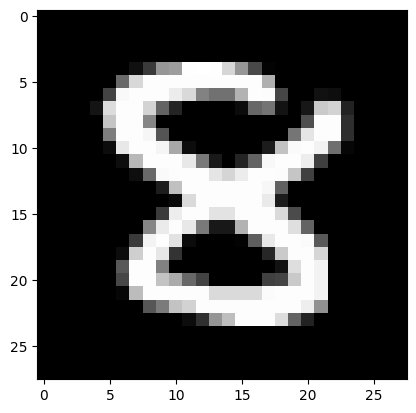

In [29]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[876]

data = data.unsqueeze(0).to(device)
output = model(data)

prediction = output.argmax(1, keepdim=True).item()

print(f'Prediction: {prediction}')

# Squeeze the channel dimension before plotting
plt.imshow(data.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')

plt.show()